In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris 

data = load_iris()

In [3]:
print(data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(type(data['data']))
print(data['data'].shape)
print(data['data'][0:5])
print(data['data'][0:5,0:2])

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [5]:
X = pd.DataFrame(data['data'],columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [6]:
y = data['target']

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=34)

In [9]:
# apply decision tree
from sklearn.tree import DecisionTreeClassifier 

treeclassifier = DecisionTreeClassifier()

In [10]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[2] <= 4.85\ngini = 0.658\nsamples = 100\nvalue = [29.0, 30.0, 41.0]'),
 Text(0.16666666666666666, 0.7, 'x[2] <= 2.45\ngini = 0.517\nsamples = 58\nvalue = [29, 28, 1]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.25, 0.5, 'x[3] <= 1.65\ngini = 0.067\nsamples = 29\nvalue = [0, 28, 1]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= 5.4\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8333333333333334, 0.7, 'x[3] <= 1.75\ngini = 0.091\nsamples = 42\nvalue = [0, 2, 40]'),
 Text(0.6666666666666667, 0.8, '  False'),
 Text(0.75, 0.5, 'x[2] <= 5.05\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 6.15\ngini = 0.444\nsamples = 3\nv

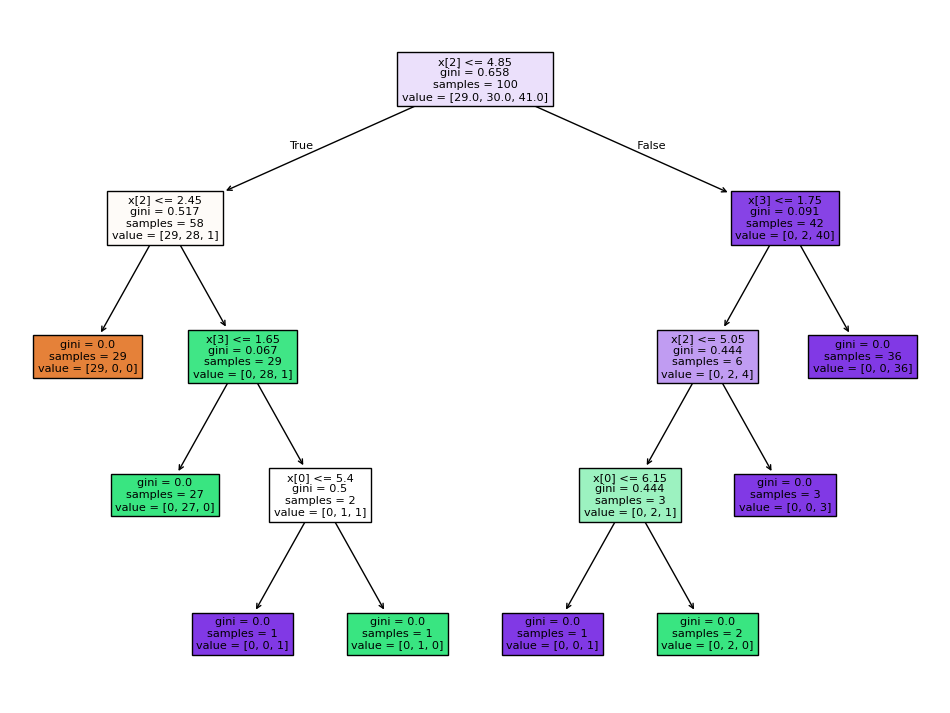

In [11]:
# visualize the tree 
from sklearn import tree 

plt.figure(figsize=(12,9))
tree.plot_tree(treeclassifier,filled=True)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_test_model1 = treeclassifier.predict(X_test)

print("accuracy score: ",accuracy_score(y_test,y_pred_test_model1))
print()
print("classification_report: \n",(y_test,y_pred_test_model1))
print()
print("Confusion Metrics: \n",confusion_matrix(y_test,y_pred_test_model1))


accuracy score:  0.94

classification_report: 
 (array([1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 0]), array([1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 1, 0]))

Confusion Metrics: 
 [[21  0  0]
 [ 0 19  1]
 [ 0  2  7]]


In [13]:
# So as we want to do prunning we will cut this at max_depth = 3 

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.85\ngini = 0.658\nsamples = 100\nvalue = [29.0, 30.0, 41.0]'),
 Text(0.25, 0.5, 'x[2] <= 2.45\ngini = 0.517\nsamples = 58\nvalue = [29, 28, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.067\nsamples = 29\nvalue = [0, 28, 1]'),
 Text(0.75, 0.5, 'x[3] <= 1.75\ngini = 0.091\nsamples = 42\nvalue = [0, 2, 40]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

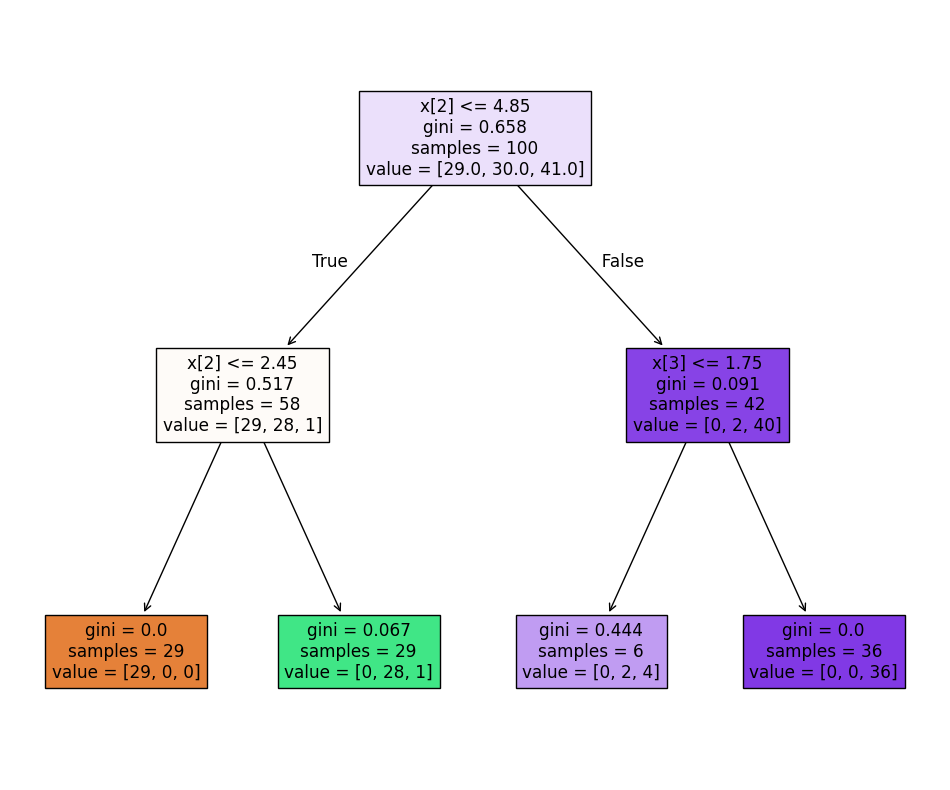

In [14]:
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)

In [15]:
y_pred_test_model2 = model.predict(X_test)

print("accuracy score: ",accuracy_score(y_test,y_pred_test_model2))
print()
print("classification_report: \n",(y_test,y_pred_test_model2))
print()
print("Confusion Metrics: \n",confusion_matrix(y_test,y_pred_test_model2))

accuracy score:  0.92

classification_report: 
 (array([1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 0]), array([1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 1, 0]))

Confusion Metrics: 
 [[21  0  0]
 [ 0 18  2]
 [ 0  2  7]]


### Decision Tree Pre Prunning

Its hyper-parameter testing of DT model

In [16]:
params = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5],  # just for this dataset
    'max_features': ['auto','sqrt','log2']
}
params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [17]:
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

treemodel = DecisionTreeClassifier()

grid = GridSearchCV(estimator=treemodel,param_grid=params,cv=5,verbose=2,scoring='accuracy',refit=True)

In [18]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [19]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [20]:
y_pred_test_prepruned = grid.predict(X_test)

print("accuracy score: ",accuracy_score(y_test,y_pred_test_prepruned))
print()
print("classification_report: \n",(y_test,y_pred_test_prepruned))
print()
print("Confusion Metrics: \n",confusion_matrix(y_test,y_pred_test_prepruned))

accuracy score:  0.92

classification_report: 
 (array([1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 0]), array([1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 0, 1, 0]))

Confusion Metrics: 
 [[21  0  0]
 [ 0 19  1]
 [ 0  3  6]]
